# Tutorial Part-of-Speech tagging  Con Deep Learning

### En este tutorial, veremos cómo puede usar un modelo simple en Keras, para entrenar y evaluar una red neuronal artificial para problemas de clasificación de múltiples clases.

## PARTE 1  -  Pre-Procesamiento

In [0]:
# Asegurar reproducibilidad

import numpy as np

CUSTOM_SEED = 42
np.random.seed(CUSTOM_SEED)

### Descargamos el Corpus Ancora - Cess_esp del nltk

In [2]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

### Extraemos las oraciones tageadas del Corpus

In [0]:
import random
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()
#print('a random sentence: \n-> {}'.format(random.choice(sentences)))

### Extraemos los datos de la cantidad de oraciones a ser usadas y un ejemplo de una oracion presente en el corpus

In [4]:
print(tagged_sentences[0])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]
Tagged sentences:  6030
Tagged words: 192685


### Se procede a Dividir en una lista de Oraciones dividida en lista de palabras y cada palabra con un correspondiente tag en un alista diferente

In [0]:
import numpy as np
 
sentences, tagss =[], [] 
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))


### Imprimimos una posicion de la lista como ejemplo

In [6]:
print(sentences[5])
print(tagss[5])

['EDF' 'tiene' 'previsto' 'invertir' '194' 'millones' 'de' 'euros' '-Fpa-'
 '186' 'millones' 'de' 'dólares' '-Fpt-' 'en' 'la' 'central' 'de'
 'Río_Bravo' ',' 'con' 'una' 'potencia' 'de' '495' 'megavatios' ',' 'y'
 '134' 'millones' 'de' 'euros' '-Fpa-' '28' 'millones' 'de' 'dólares'
 '-Fpt-' 'en' 'Saltillo' ',' 'que' 'como' 'la' 'primera' 'funcionará'
 'con' 'gas' 'natural' 'y' 'cuya' 'potencia' 'prevista' 'es' 'de' '247'
 'megavatios' '.']
['np00000' 'vmip3s0' 'aq0msp' 'vmn0000' 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpa'
 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpt' 'sps00' 'da0fs0' 'ncfs000' 'sps00'
 'np00000' 'Fc' 'sps00' 'di0fs0' 'ncfs000' 'sps00' 'Z' 'ncmp000' 'Fc' 'cc'
 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpa' 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpt' 'sps00'
 'np00000' 'Fc' 'pr0cn000' 'cs' 'da0fs0' 'ao0fs0' 'vmif3s0' 'sps00'
 'ncms000' 'aq0cs0' 'cc' 'pr0fs000' 'ncfs000' 'aq0fsp' 'vsip3s0' 'sps00'
 'Z' 'ncmp000' 'Fp']


### Dividimos el corpus de la siguiente manera, Utilizamos aproximadamente el 60% de las oraciones etiquetadas para el entrenamiento, el 20% como conjunto de validación y el 20% para evaluar nuestro modelo.

In [0]:
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

### Imprimimos los tamaños de las listas que nos indicaran el tamaño de filas de las matrices con las que estaremos trabajando

In [8]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

['*' 'El' 'Madrid' 'precisa' 'que' 'el' 'Deportivo' 'gane' 'la' 'Liga' ','
 'porque' 'los' 'gallegos' 'no' 'son' 'considerados' 'unos' 'herederos'
 ',' 'sino' 'unos' 'entrometidos' 'que' 'se' 'supone' 'temporales' ','
 'que' 'pertenecen' 'a' 'la' 'actualidad' 'más' 'rabiosa' 'y' 'no' 'a'
 'la' 'historia' 'más' 'enrabietada' '.']
['El' 'técnico' 'barcelonista' 'ha' 'asegurado' 'que' 'la' 'visita' 'de'
 'Gaspart' 'ha' 'contribuido' 'a' '"' 'sumar' '"' ',' 'y' '*0*' 'ha'
 'argumentado' 'que' 'el' 'encuentro' 'con' 'el' 'presidente' 'significa'
 'que' 'en' 'el' 'Barcelona' '"' 'todos' 'van' 'en' 'la' 'misma'
 'dirección' '"' '.']
['Lo_suyo' ',' 'lo' 'de' 'las' 'ratas' ',' 'no' 'es' 'la' 'carroña' 'pura'
 'y' 'dura' 'sino' 'la' 'vida' 'regalada' ',' 'el' 'eterno' 'banquete'
 'de' 'sobras' 'y' 'residuos' ',' 'el' 'festín' 'organizado' 'a' 'la'
 'sobra' 'de' 'la' 'abundancia' 'y' 'el' 'hartazgo' '.']

tra

### Ahora creamos una array con todas las palabras y los tags presentes en el corpus, adicionalmente se crea un diccionario que contiene las palabras unicas y los tags unicos de tal forma que no se repitan y que contienen un indice o llave

In [0]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

### Ahora procedemos a transformar cada uno de los conjuntos de oraciones y tags en vectores numericos, modificando la palabra o tag en un Valor numerico que corresponde a una llave en el diccionario de palbras o tags

In [0]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)


### Se imprime la longitud de las matrices y una muesta de cada una de las matrices creadas

In [14]:
print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:")

print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

3618
1206
1206
3618
1206
1206
[6879, 21054, 1096, 4286, 10777, 21054, 20294, 3389, 9134, 14316, 19490, 22066, 2667, 6265, 12059, 8700, 1529, 3629, 23591, 19490, 1895, 3629, 12761, 10777, 11673, 8687, 4090, 19490, 10777, 16069, 19145, 9134, 13215, 16408, 8038, 9946, 12059, 19145, 9134, 15614, 16408, 9890, 24487]
[10897, 19490, 9675, 7536, 7925, 11330, 19490, 12059, 15583, 9134, 23606, 15535, 9946, 968, 1895, 9134, 11728, 24069, 19490, 21054, 13504, 834, 7536, 20862, 9946, 5828, 19490, 21054, 20918, 2222, 19145, 9134, 6499, 7536, 9134, 3216, 9946, 21054, 5810, 24487]
[21054, 17965, 11406, 6215, 9457, 10777, 9134, 14563, 7536, 6354, 6215, 642, 19145, 888, 15141, 888, 19490, 9946, 2635, 6215, 22350, 10777, 21054, 6685, 14580, 21054, 20639, 13501, 10777, 3593, 21054, 20672, 888, 8090, 20561, 3593, 9134, 706, 6073, 888, 24487]
[230, 271, 171, 76, 6, 271, 203, 242, 140, 250, 217, 6, 14, 132, 213, 280, 73, 133, 132, 217, 154, 133, 132, 251, 57, 76, 283, 217, 251, 23, 89, 140, 70, 12, 38, 154, 

### Se calcula cual es la oracion que mayor cantidad de Palabras contiene

In [15]:
MAX_LENGTH = len(max(train_sentences_X, key=len))
print(MAX_LENGTH)  # 271

134


### Se procede a Normalizar las matrices para que todas contengan el numero de columans, con la longitud maxima de palabras encontradas anteriormente

In [16]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Using TensorFlow backend.


[ 6879 21054  1096  4286 10777 21054 20294  3389  9134 14316 19490 22066
  2667  6265 12059  8700  1529  3629 23591 19490  1895  3629 12761 10777
 11673  8687  4090 19490 10777 16069 19145  9134 13215 16408  8038  9946
 12059 19145  9134 15614 16408  9890 24487     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
[10897 19490  9675  7536  7925 11330 19490 12059 15583  9134 23606 15535
  9946   968  1895  9134 11728 24069 19490 21054 13504   834  7536 20862
  9946  5828 19490 21054 20918  2222 

### Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot

In [0]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

### Desarrollamos una prueba de la categorisacion de los tags

In [21]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## PARTE 2  -  Entrenamiento

### Definimos el Modelo Base con el cual se procedera a desarrollar la fase de Entrenamiento

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
 
model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Dropout(0.5))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 134, 128)          3135872   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 134, 512)          788480    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 134, 291)          149283    
_________________________________________________________________
dropout_1 (Dropout)          (None, 134, 291)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 134, 291)          0         
Total params: 4,073,635
Trainable params: 4,073,635
Non-trainable params: 0
___________

### Se dedarrolla el entrenamiento del modelo

In [25]:
model_hist = model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)),
                       validation_data=(eval_sentences_X, to_categorical(eval_tags_y, len(tag2index))),
                       batch_size=128, 
                       epochs=40,
                       validation_split=0.2)

Train on 3618 samples, validate on 1206 samples
Epoch 1/40
3618/3618 [==============================] - 105s 29ms/step - loss: 3.4647 - acc: 0.5777 - val_loss: 1.1045 - val_acc: 0.7897
Epoch 2/40
3618/3618 [==============================] - 104s 29ms/step - loss: 3.0637 - acc: 0.7584 - val_loss: 1.0667 - val_acc: 0.7918
Epoch 3/40
3618/3618 [==============================] - 104s 29ms/step - loss: 3.0351 - acc: 0.7725 - val_loss: 1.0305 - val_acc: 0.7925
Epoch 4/40
3618/3618 [==============================] - 103s 29ms/step - loss: 3.0200 - acc: 0.7770 - val_loss: 1.0004 - val_acc: 0.8003
Epoch 5/40
3618/3618 [==============================] - 103s 28ms/step - loss: 3.0004 - acc: 0.7863 - val_loss: 0.9669 - val_acc: 0.8133
Epoch 6/40
3618/3618 [==============================] - 103s 29ms/step - loss: 2.9684 - acc: 0.7971 - val_loss: 0.8939 - val_acc: 0.8470
Epoch 7/40
3618/3618 [==============================] - 104s 29ms/step - loss: 2.8967 - acc: 0.8140 - val_loss: 0.7759 - val_acc: 

## PARTE 3  -  Evaluación del Modelo

### Evaluamos el modelo y calculamos el valor de precision con respecto a los datos de prueba

In [26]:
scores = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores[1] * 100}")   # acc: 99.09751977804825

1206/1206 [==============================] - 12s 10ms/step
acc: 97.59040610311834


### Definimos la funcion que nos servira para graficar el comportamiento del modelo en cada epoca del entrenamiento

In [0]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')

### Procedemos a Graficar el comportamiento del Entrenamiento, tanto del conjuento de entrenamiento como el de validacion con respecto a la cantidad de epocas

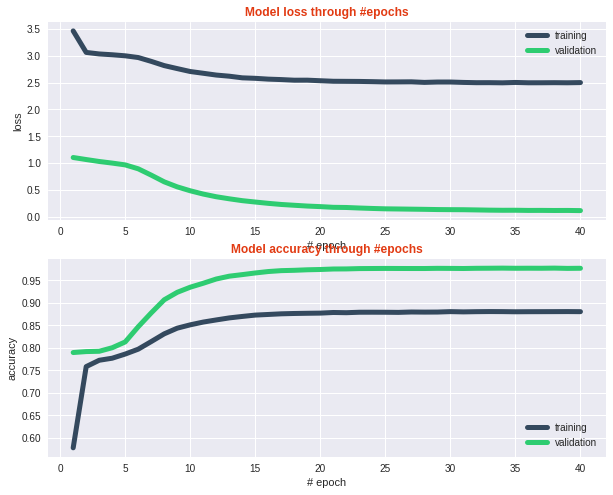

In [29]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('acc', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_acc', [])
)

### Función que Permite convertir Indices en Tags

In [0]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

### Hallamos los valores de F1 score, recall, precision

In [78]:
prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(prediction[0])

predicted = []
for s in log_tokens:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    predicted.append(s_int)
    
print(predicted[0])

[[271, 175, 91, 43, 195, 6, 140, 70, 89, 47, 43, 195, 89, 96, 141, 96, 217, 154, 90, 43, 195, 6, 271, 175, 89, 271, 175, 76, 6, 89, 271, 171, 96, 184, 23, 89, 140, 64, 70, 96, 62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [89, 140, 70, 217, 133, 132, 89, 175, 102, 217, 6, 12, 205, 89, 247, 175, 217, 156, 47, 154, 90, 194, 12, 6, 6, 90, 94, 247, 175, 62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [89, 26, 119, 251, 57, 98, 57, 23, 96, 45, 154, 141, 96, 125, 70, 217, 40, 271, 175, 217, 6, 

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

y_test = test_tags_y

print ('\nClasification report:\n', classification_report(y_test[0], predicted[0]))


Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           6       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         3
          47       0.00      0.00      0.00         0
          62       1.00      1.00      1.00         1
          64       1.00      1.00      1.00         1
          70       1.00      1.00      1.00         2
          76       1.00      1.00      1.00         1
          78       0.00      0.00      0.00         2
          89       1.00      1.00      1.00         5
          90       1.00      1.00      1.00         1
          91       1.00      1.00      1.00         1
          96       1.00      1.00      1.00         4
         140       1.00      1.00      1.00         2
         141       1.00      1.00      1.00         1
         154       1.00      1.00      1.00         1
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## PARTE 4  -  Testing

### Creamos un pequeño Ejemplo

In [37]:
test_samples = [
    "Correr es importante para mi .".split(),
    "Yo fui a correr todos los dias durante un mes .".split()
]
print(test_samples)

[['Correr', 'es', 'importante', 'para', 'mi', '.'], ['Yo', 'fui', 'a', 'correr', 'todos', 'los', 'dias', 'durante', 'un', 'mes', '.']]


### Convertimos el texto en Una entrada para el Modelo

In [38]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)

[[17274 15583   883 12301 19632 24487     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [10923 14419 19145 17274  8090  2667     1 20264  4547  4134 24487     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    

### Se Ejecuta la predicion con la Entrada del modelo entrenado

In [0]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

### Conversion de la Salida del Modelo a un lista de Indices de Tags

In [0]:
#print(len(predictions))
log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
print(log_tokens)

### Presentacion de los Resultados

In [0]:
from prettytable import PrettyTable

heads1 = test_samples[0]
heads2 = test_samples[1]

t1 = PrettyTable(heads1)
body1 = log_tokens[0][:len(test_samples[0])]
t1.add_row(body1)
print (t1)

print ("\n")

t2 = PrettyTable(heads2)
body2 = log_tokens[1][:len(test_samples[1])]
t2.add_row(body2)
print (t2)

### Tratemos de Mejorar la Precision del Modelo, usando una clase que permita ignorar los Valores de Relleno

In [0]:
from keras import backend as K
 
def ignore_class_accuracy(to_ignore=0):
    def ignore_accuracy(y_true, y_pred):
        y_true_class = K.argmax(y_true, axis=-1)
        y_pred_class = K.argmax(y_pred, axis=-1)
 
        ignore_mask = K.cast(K.not_equal(y_pred_class, to_ignore), 'int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return ignore_accuracy

### Definimos nuevamente nuestro modelo, agregado la clase Creada

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
 

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Dropout(0.5))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001),  metrics=['accuracy', ignore_class_accuracy(0)]) 

model.summary()

### Procedemos a Entrenar Nuevamente

In [0]:
model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)), batch_size=128, epochs=40, validation_split=0.2)

### Calculamos nuevamente la Precisión

In [0]:
scores2 = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores2[1] * 100}")   # acc: 99.09751977804825

### Relaizamos nuevamente el calcilo de F1-score, recall, y precision

### Relaizamos nuevamente una prueba con el Ejemplo de Prueba

In [0]:
predictions1 = model.predict(test_samples_X)
log_tokens1  = logits_to_tokens(predictions1, {i: t for t, i in tag2index.items()})
print(log_tokens1)

### Presentamos los Resultados

In [0]:
from prettytable import PrettyTable

heads3 = test_samples[0]
heads4 = test_samples[1]

t3 = PrettyTable(heads3)
body3 = log_tokens1[0][:len(test_samples[0])]
t3.add_row(body3)
print (t3)

print ("\n")

t4 = PrettyTable(heads4)
body4 = log_tokens1[1][:len(test_samples[1])]
t4.add_row(body2)
print (t4)